In [2]:
import deepxde as dde
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from naca4digit_airfoil import Naca4DigitAirfoil
import pandas as pd
from scipy.interpolate import griddata
import tensorflow as tf

In [3]:
dde.backend.utils.import_tensorflow()

True

In [4]:
cfd_df = pd.read_csv('cfd_data.csv', delimiter=',')

In [5]:
x_min_init = -0.24
x_max_init = 0.74
y_min_init = -0.24
y_max_init = 0.24

x_min = -0.049
x_max = 0.149
y_min = -0.049
y_max = 0.049

In [6]:
L = 0.05

In [7]:
airfoil = Naca4DigitAirfoil(c=L, M=2, P=4, T=12, a=0, offset_x=0, offset_y=0)
airfoil_geom  = dde.geometry.Polygon(airfoil.get_boundary_points(250))

In [8]:
df = pd.read_csv('./GustAnalyticNebula561/results_hybrid.csv')

In [9]:
x_loaded = df['x'].values
y_loaded = df['y'].values
u_loaded = df['u'].values
v_loaded = df['v'].values
p_loaded = df['p'].values

In [10]:
x_cfd = cfd_df['x'].values
y_cfd = cfd_df['y'].values
u_cfd = cfd_df['u'].values
v_cfd = cfd_df['v'].values
p_cfd = cfd_df['p'].values

In [11]:
for i in range(len(x_loaded)):
    if airfoil_geom.inside(np.array([[x_loaded[i], y_loaded[i]]])):
        u_loaded[i] = 0
        v_loaded[i] = 0

In [12]:
X, Y = np.meshgrid(np.linspace(x_min, x_max, 2000), 
                             np.linspace(y_min, y_max, 2000))

In [13]:
U = griddata((x_loaded, y_loaded), u_loaded, (X, Y), method='linear')
V = griddata((x_loaded, y_loaded), v_loaded, (X, Y), method='linear')
P = griddata((x_loaded, y_loaded), p_loaded, (X, Y), method='linear')

In [14]:
def set_domain_lims(ax):
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def set_zoomed_domain_lims(ax):
    ax.set_xlim(x_min/2, x_max/2)
    ax.set_ylim(y_min/2, y_max/2)

def set_labels(ax):
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

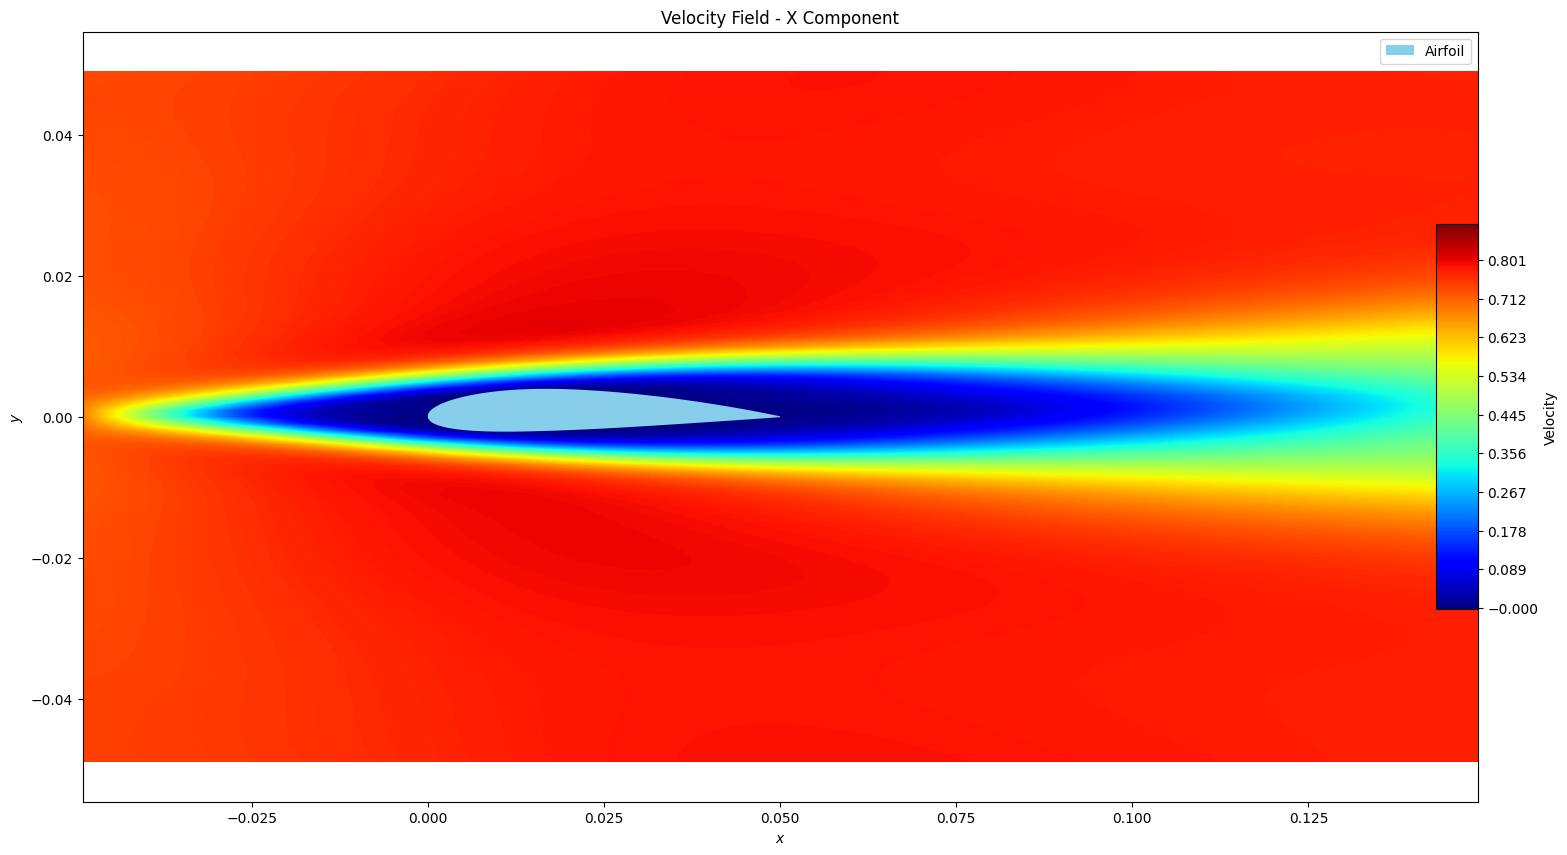

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(U.min(), 1.1*U.max(), 0.001)
cp = ax.contourf(X, Y, U, clev, cmap='jet')
set_labels(ax)
ax.set_title('Velocity Field - X Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('u_hybrid.png', dpi=300)
plt.show()

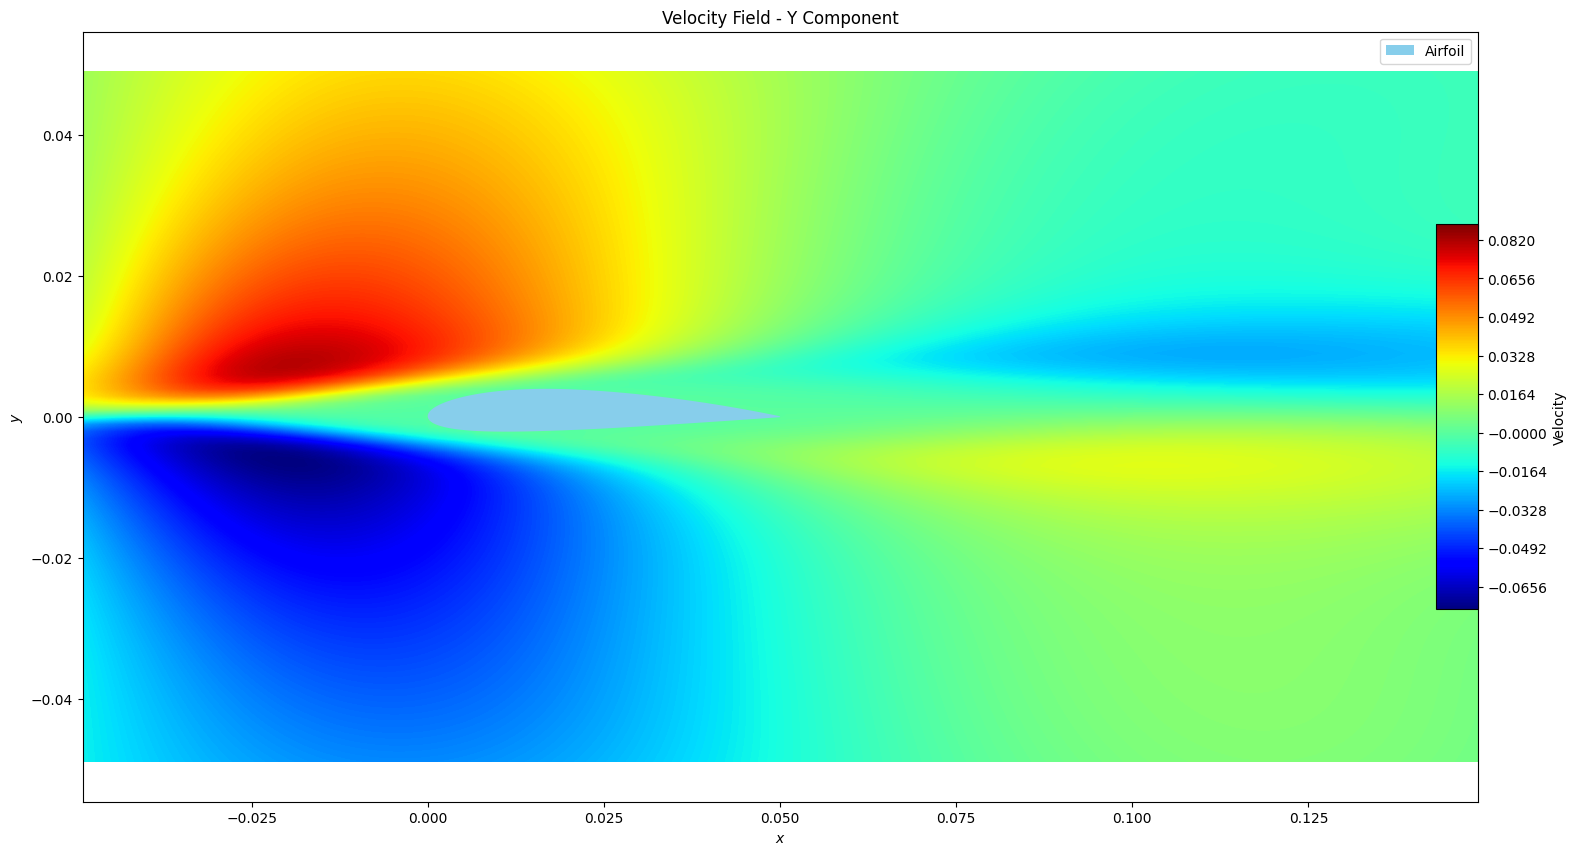

In [18]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(V.min(), 1.1*V.max(), 0.0001)
cp = ax.contourf(X, Y, V, clev, cmap='jet')
set_labels(ax)
ax.set_title('Velocity Field - Y Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('v_hybrid.png', dpi=300)
plt.show()

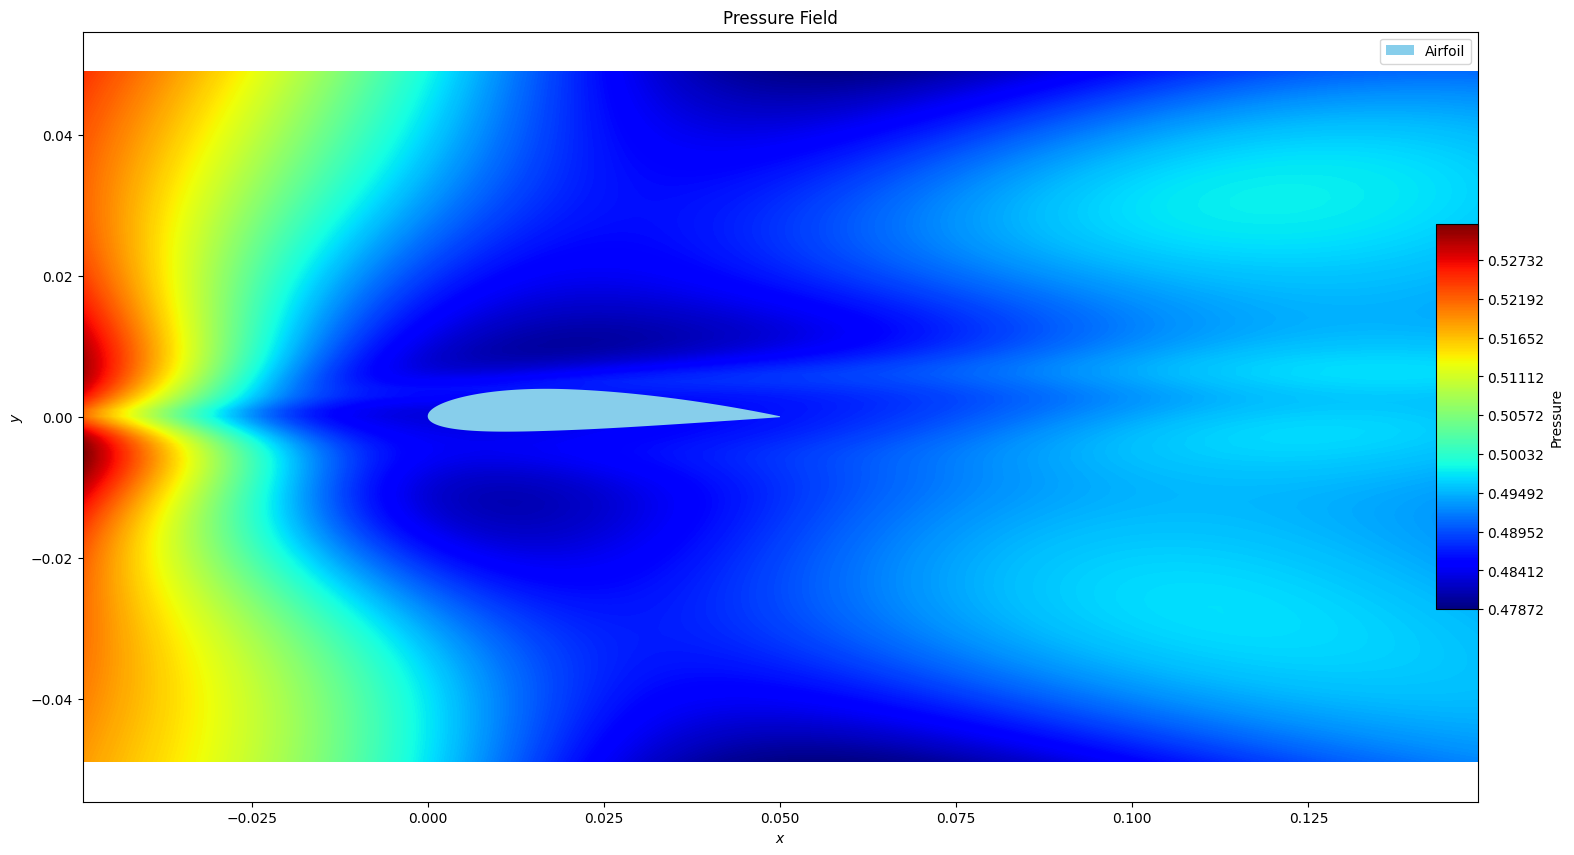

In [26]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(P.min(), P.max(), 0.0001)
cp = ax.contourf(X, Y, P, clev, cmap='jet')
set_labels(ax)
ax.set_title('Pressure Field')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Pressure')
set_domain_lims
ax.grid(False)
plt.savefig('p_hybrid.png', dpi=300)
plt.show()

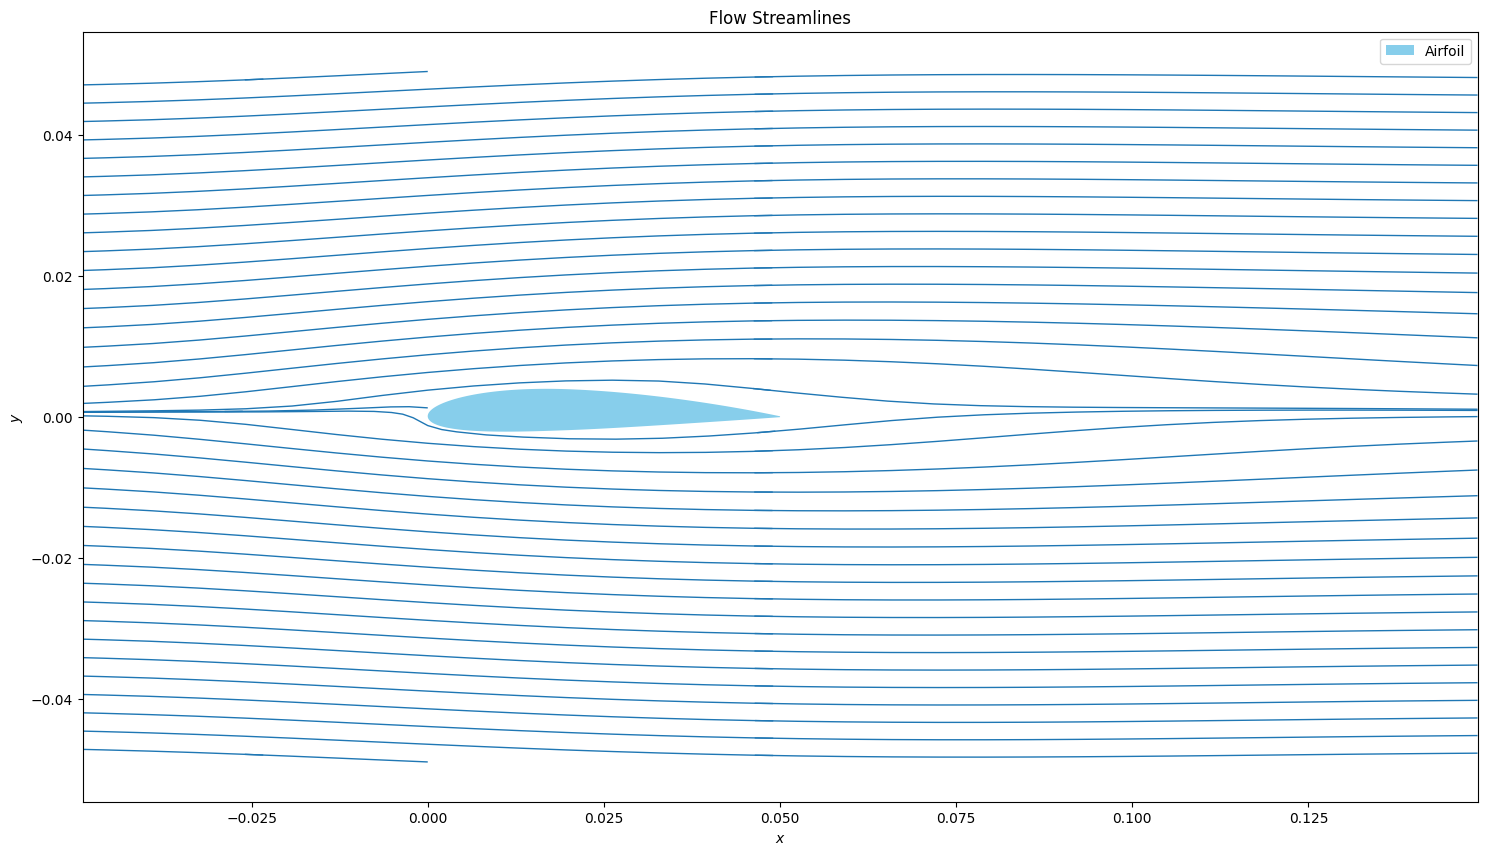

In [20]:
fig, ax = plt.subplots(figsize=(18, 10))
num_points = 40
y_start = y_min
y_end = y_max
start_points = np.zeros((num_points, 2))
start_points[:, 1] = np.linspace(y_start, y_end, num_points)
start_points[:, 0] = 0
ax.streamplot(X, Y, U, V, start_points=start_points, linewidth=1, arrowsize=1, arrowstyle='-', broken_streamlines=False)
set_labels(ax)
ax.set_title('Flow Streamlines')
airfoil.plot(ax)
set_domain_lims(ax)
ax.grid(False)
plt.savefig('flow_hybrid.png', dpi=300)
plt.show()

In [21]:
U_cfd = griddata((x_cfd, y_cfd), u_cfd, (X, Y), method='linear')
V_cfd = griddata((x_cfd, y_cfd), v_cfd, (X, Y), method='linear')
P_cfd = griddata((x_cfd, y_cfd), p_cfd, (X, Y), method='linear')

In [79]:
# U_cfd = np.nan_to_num(U_cfd)
# V_cfd = np.nan_to_num(V_cfd)
# P_cfd = np.nan_to_num(P_cfd)

In [22]:
U_err = np.abs(U_cfd - U)
V_err = np.abs(V_cfd - V)
P_err = np.abs(P_cfd - P)

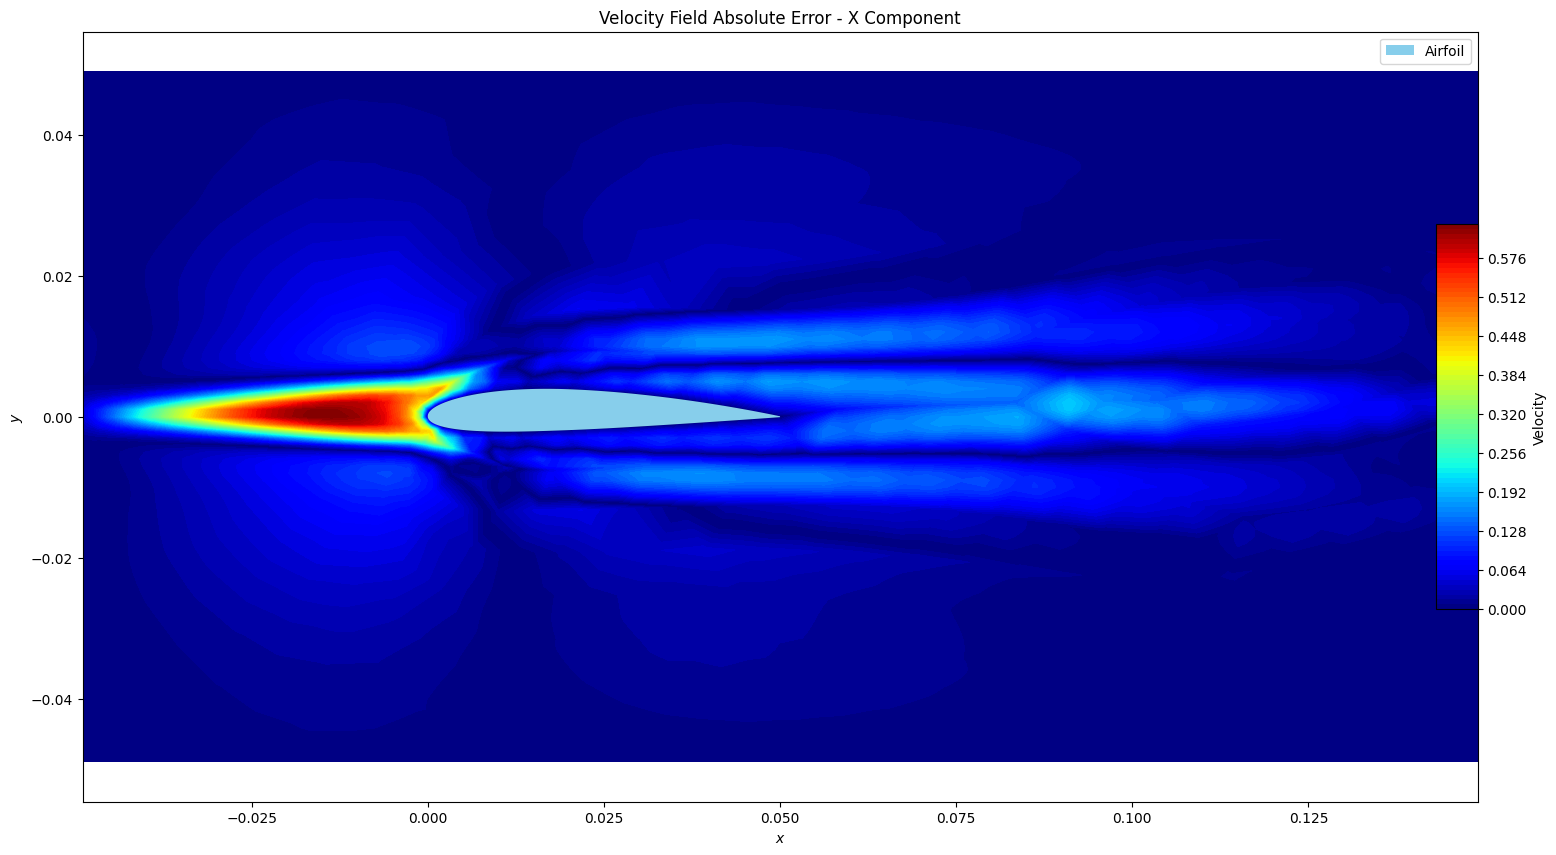

In [23]:
fig, ax = plt.subplots(figsize=(18, 10))

cp = ax.contourf(X, Y, U_err, cmap='jet', levels=100)
set_labels(ax)
ax.set_title('Velocity Field Absolute Error - X Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('u_error_hybrid.png', dpi=300)
plt.show()

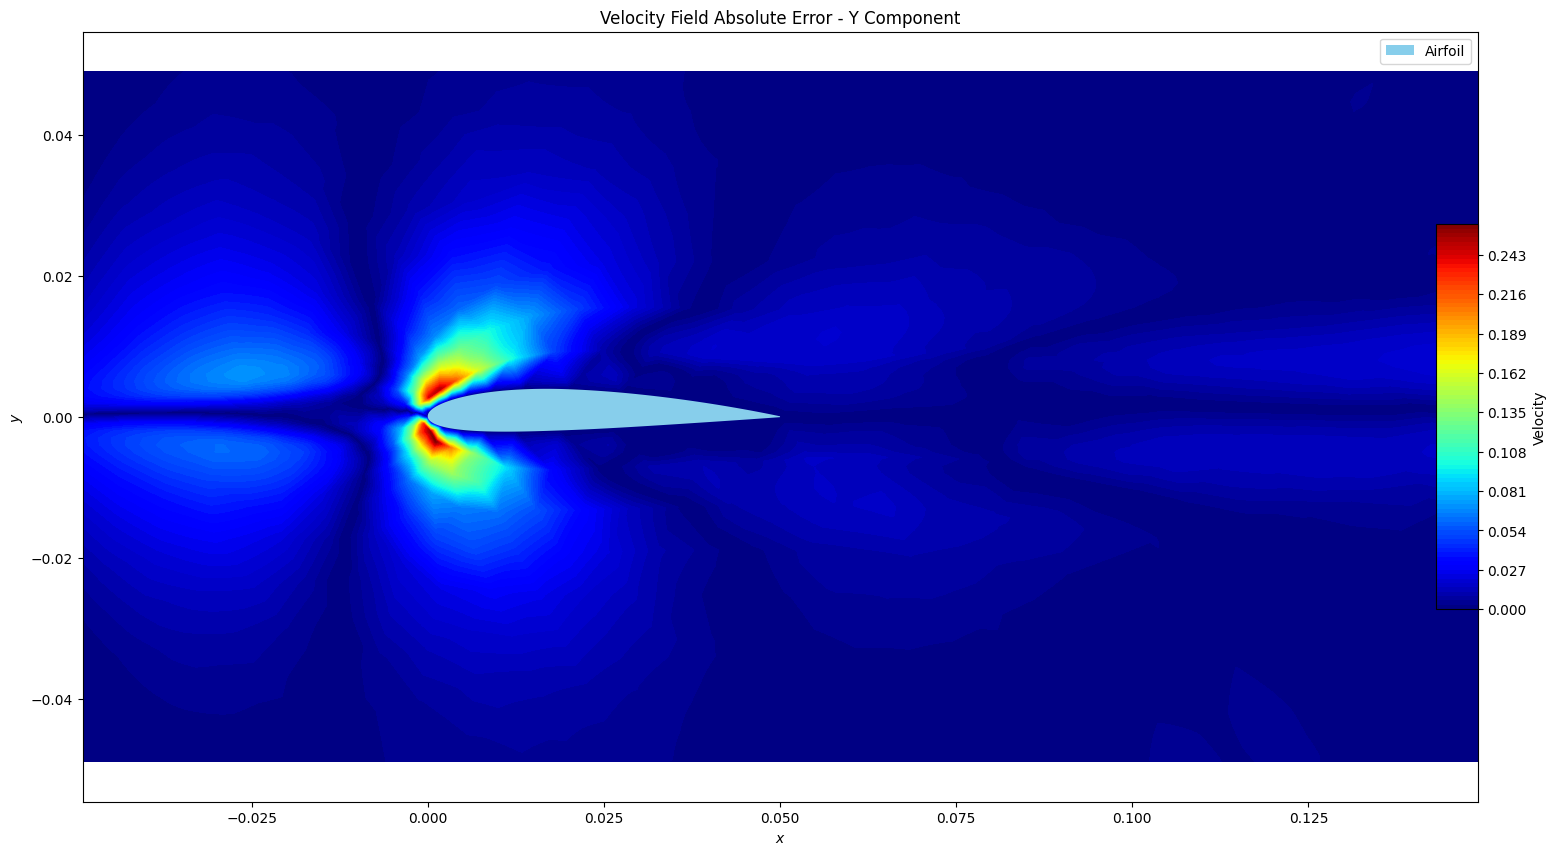

In [24]:
fig, ax = plt.subplots(figsize=(18, 10))

cp = ax.contourf(X, Y, V_err, cmap='jet', levels=100)
set_labels(ax)
ax.set_title('Velocity Field Absolute Error - Y Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('v_error_hybrid.png', dpi=300)
plt.show()

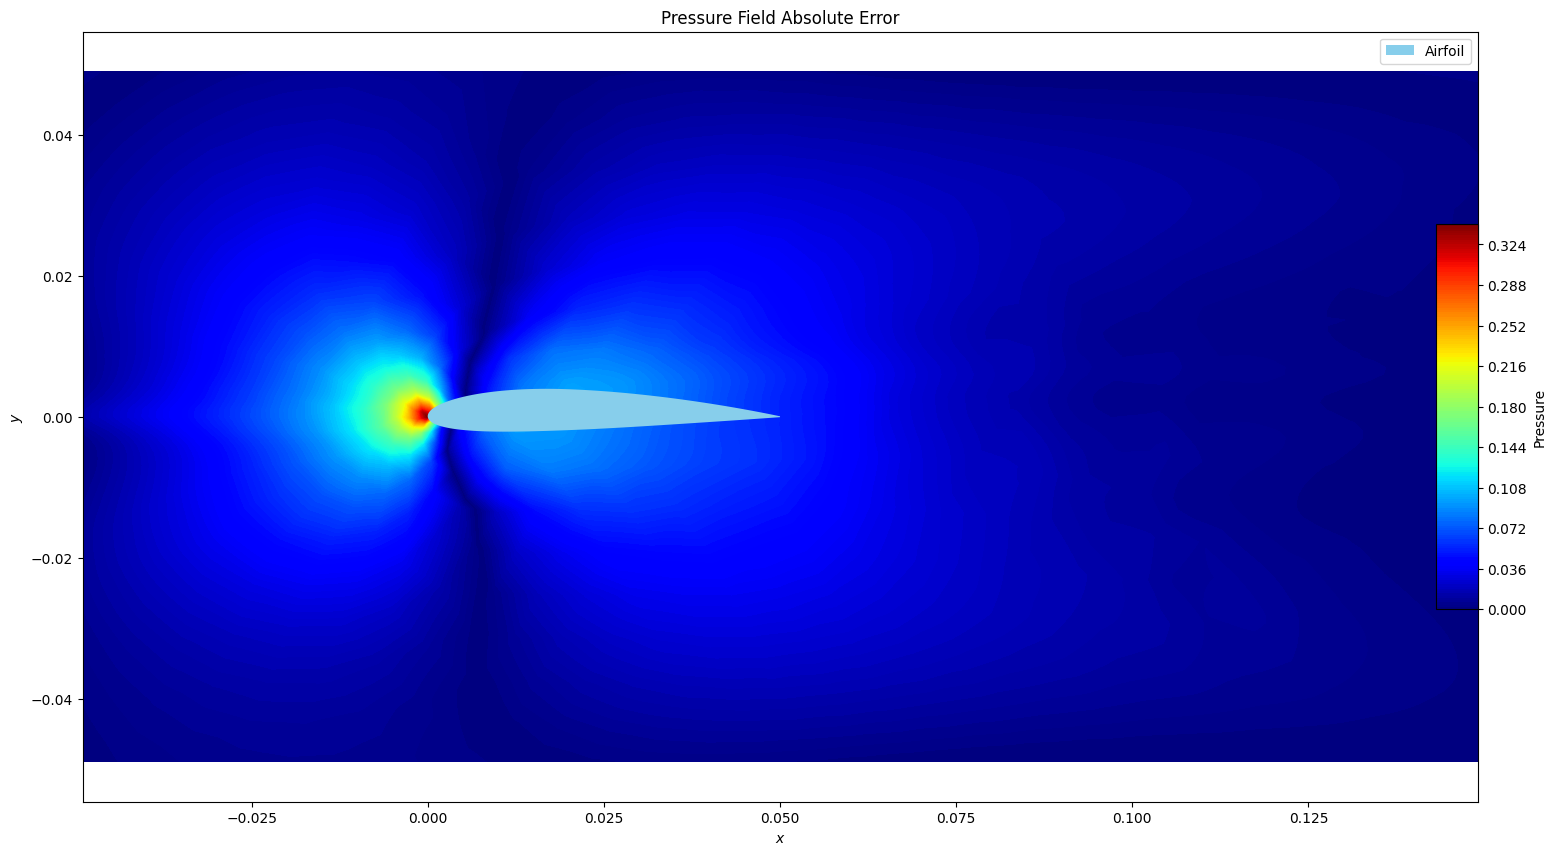

In [25]:
fig, ax = plt.subplots(figsize=(18, 10))

cp = ax.contourf(X, Y, P_err, cmap='jet', levels=200)
set_labels(ax)
ax.set_title('Pressure Field Absolute Error')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Pressure')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('p_error_hybrid.png', dpi=300)
plt.show()